In [1]:
from sklearn.ensemble import RandomForestClassifier
from sklearn.pipeline import Pipeline
from sklearn import metrics
from sklearn.feature_extraction.text import CountVectorizer
from sklearn.feature_extraction.text import TfidfTransformer
import pandas as pd
from sklearn import preprocessing
import seaborn as sns
from nltk.corpus import stopwords
import numpy as np
from nltk.tokenize import RegexpTokenizer
import re
import matplotlib.pyplot as plt

In [2]:
data_egitim = pd.read_csv('egitim.csv')
data_elektronik = pd.read_csv('elektronik.csv')
data_saglik = pd.read_csv('saglik.csv')
data_gida = pd.read_csv('gida.csv')

In [3]:
data = pd.concat([data_egitim, data_elektronik,data_saglik,data_gida], axis=0)

In [4]:
new_index = list(range(0,data.shape[0]))
data.index = new_index
data

,Unnamed: 0,class,header,descripition
0,0,egitim,Can Şikayetini Yayından Kaldırdı.,Teşekkür ediyorum
1,1,egitim,D&R Siparişim Kargoya Verilmiyor Bir Türlü,"W1374***54 numaralı siparişim 4 gündür ""paket ..."
2,2,egitim,Doğuş Akademi Yayıncılık Ürün Gelmedi,"10,200 TL'ye Bu şirkete ait Dijital444.com adl..."
3,3,egitim,D&R Siparişim 1 Haftadır Gelmedi.,Siparişim 1 hafta oldu vereli. 1 haftadır ne d...
4,4,egitim,D&R 2 Kere Ücret Çekimi,Merhaba taksitli olarak kitap siparişi verdim....
...,...,...,...,...
19131,4779,gida,Ercüment Şikayetini Yayından Kaldırdı.,Teşekkür ederim
19132,4780,gida,Yayla Bakliyat Pirincin İçinden Siyah Renkli B...,Ankara Migros'tan aldığım 2 kg Yayla marka pil...
19133,4781,gida,Ercüment Şikayetini Yayından Kaldırdı.,Teşekkür ederim tekrardan
19134,4782,gida,Yudum Böyle Bir Köpürme Yaşamadım,Yudum ayçiçek yağını sürekli alırım güvendiğim...


In [5]:
# for i in data.header:
#    if('Şikayetini Yayından Kaldırdı' in i): 
#         print(i)
#         print('founded succesfully')
        
for index in range(0,data.shape[0]):
   if('Şikayetini Yayından Kaldırdı' in data.header[index]): 
        data = data.drop(index)

In [6]:
data.shape

(18026, 4)

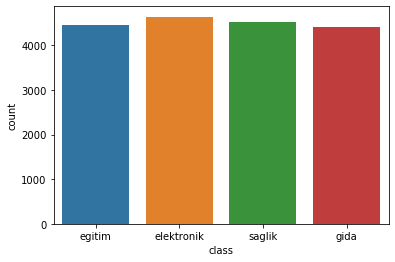

In [7]:
sns.countplot(x = 'class', data = data)

In [8]:
data = data.drop(columns=['Unnamed: 0', 'header'])


In [9]:
le = preprocessing.LabelEncoder()
le.fit(data['class'])
data['class'] = le.fit_transform(data['class'])

In [10]:
le.classes_

array(['egitim', 'elektronik', 'gida', 'saglik'], dtype=object)

In [11]:
data.isnull().sum()

class           0
descripition    0
dtype: int64

In [12]:
data = data.dropna(axis='rows')

In [13]:
data['class'].nunique()

4

In [14]:
data

,class,descripition
1,0,"W1374***54 numaralı siparişim 4 gündür ""paket ..."
2,0,"10,200 TL'ye Bu şirkete ait Dijital444.com adl..."
3,0,Siparişim 1 hafta oldu vereli. 1 haftadır ne d...
4,0,Merhaba taksitli olarak kitap siparişi verdim....
5,0,Ebada o gün içerisinde yapılanların armalara y...
...,...,...
19127,2,Havzan Meram Konya A101'den 3 paket karides al...
19128,2,"Marka bilinirliğine aldanıp Bim'den ""Başyazıcı..."
19130,2,"Bir koli Türem l yumurta aldım, içinde bir sür..."
19132,2,Ankara Migros'tan aldığım 2 kg Yayla marka pil...


In [15]:
def preprocess(sentence):
    stp_words = stopwords.words('turkish')
    stp_words.append('devamını')
    stp_words.append('oku')
    stp_words.append('bir')
    stp_words.append('i')
    stp_words.append('ancak')
    stp_words.append('bile')
    stp_words.append('fakat')
    stp_words.append('rağmen')
    stp_words.append('kadar')
    stp_words.append('hiçbir')
    stp_words.append('önce')
    
    
    sentence = sentence.lower()
    tokenizer = RegexpTokenizer(r'\w+')
    num_filter = re.sub(r'\d+', '', sentence)
    tokens = tokenizer.tokenize(num_filter)
    for token in tokens:
        if len(str(token))<2:
            stp_words.append(token)
    filtered_words = [w for w in tokens if not w in stp_words]
    return " ".join(filtered_words)

for i in range(data.shape[0]): 
  
        # reassign the values to the product column 
        # we first strip the whitespaces using strip() function 
        # then we capitalize the first letter using capitalize() function 
        data.iat[i, 1]= preprocess(data.iat[i, 1])

data

,class,descripition
1,0,numaralı siparişim gündür paket hazır faturası...
2,0,tl ye şirkete ait dijital com adlı siteden tl ...
3,0,siparişim hafta oldu vereli haftadır dönen var...
4,0,merhaba taksitli olarak kitap siparişi verdim ...
5,0,ebada gün içerisinde yapılanların armalara yan...
...,...,...
19127,2,havzan meram konya den paket karides aldım boz...
19128,2,marka bilinirliğine aldanıp bim den başyazıcı ...
19130,2,koli türem yumurta aldım içinde sürü küçük yum...
19132,2,ankara migros tan aldığım kg yayla marka pilav...


56317


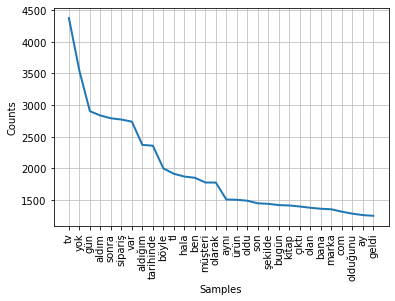

In [16]:
import nltk
from nltk.tokenize import word_tokenize
reviews = data.descripition.str.cat(sep=' ')
#function to split text into word
tokens = word_tokenize(reviews)
vocabulary = set(tokens)
print(len(vocabulary))
frequency_dist = nltk.FreqDist(tokens)
sorted(frequency_dist,key=frequency_dist.__getitem__, reverse=True)[0:50]
frequency_dist.plot(30,cumulative=False)

(-0.5, 399.5, 199.5, -0.5)

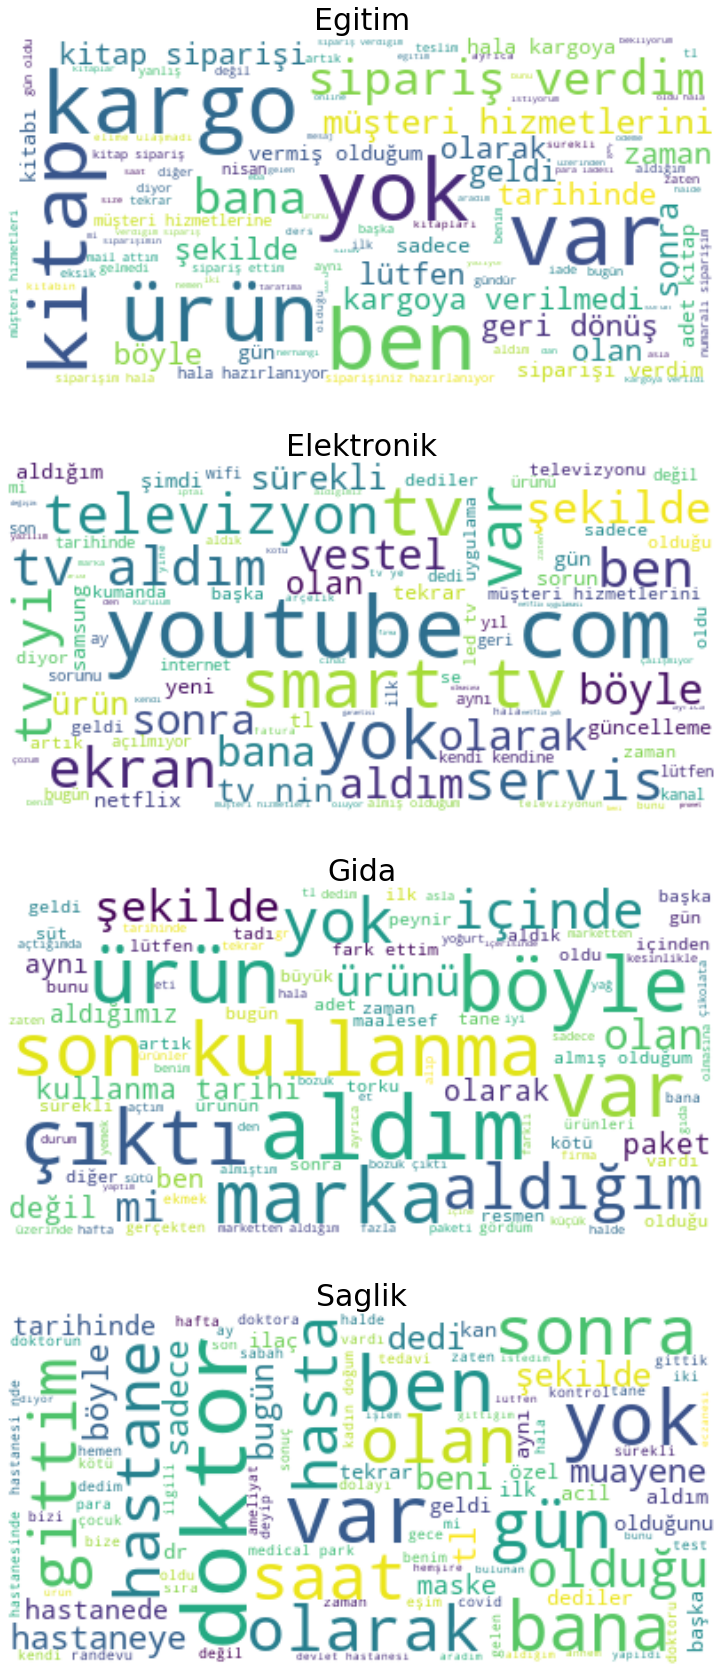

In [17]:
#!pip install wordcloud
from wordcloud import WordCloud

wordcloud = WordCloud()

fig, ax = plt.subplots(4, 1, figsize  = (30,30))


def prepare_wc(data):
    all_words = []
    wc_data = ''
    for compliant in data.descripition:
        compliant = str(compliant)
        words = compliant.split(' ')
        wc_data = wc_data + ' '.join(words)
    return wc_data
    
egitim_wc = prepare_wc(data[data['class']== 0])
elektronik_wc = prepare_wc(data[data['class']== 1])
gida_wc = prepare_wc(data[data['class']== 2])
saglik_wc = prepare_wc(data[data['class']== 3])

wordcloud_egitim = WordCloud(max_font_size=50, max_words=100, background_color="white").generate(egitim_wc)
wordcloud_elektronik = WordCloud(max_font_size=50, max_words=100, background_color="white").generate(elektronik_wc)
wordcloud_gida = WordCloud(max_font_size=50, max_words=100, background_color="white").generate(gida_wc)
wordcloud_saglik = WordCloud(max_font_size=50, max_words=100, background_color="white").generate(saglik_wc)



ax[0].imshow(wordcloud_egitim, interpolation='bilinear')
ax[0].set_title('Egitim', fontsize=30)
ax[0].axis('off')
ax[1].imshow(wordcloud_elektronik, interpolation='bilinear')
ax[1].set_title('Elektronik',fontsize=30)
ax[1].axis('off')
ax[2].imshow(wordcloud_gida, interpolation='bilinear')
ax[2].set_title('Gida',fontsize=30)
ax[2].axis('off')
ax[3].imshow(wordcloud_saglik, interpolation='bilinear')
ax[3].set_title('Saglik',fontsize=30)
ax[3].axis('off')

In [18]:
from sklearn.model_selection import train_test_split
X = data.descripition
y = data['class']
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.33, random_state=42)

In [19]:
X_train = X_train.values.tolist()
X_test = X_test.values.tolist()

In [20]:
y_train =y_train.to_numpy()
y_test = y_test.to_numpy() 

In [21]:
text_clf = Pipeline([('vect', CountVectorizer()),
                     ('tfidf', TfidfTransformer()),
                     ('clf', RandomForestClassifier(n_estimators=100)),
                     ])

In [22]:
text_clf.fit(X_train, y_train)

Pipeline(memory=None,
         steps=[('vect',
                 CountVectorizer(analyzer='word', binary=False,
                                 decode_error='strict',
                                 dtype=<class 'numpy.int64'>, encoding='utf-8',
                                 input='content', lowercase=True, max_df=1.0,
                                 max_features=None, min_df=1,
                                 ngram_range=(1, 1), preprocessor=None,
                                 stop_words=None, strip_accents=None,
                                 token_pattern='(?u)\\b\\w\\w+\\b',
                                 tokenizer=None, vocabulary=Non...
                 RandomForestClassifier(bootstrap=True, ccp_alpha=0.0,
                                        class_weight=None, criterion='gini',
                                        max_depth=None, max_features='auto',
                                        max_leaf_nodes=None, max_samples=None,
                                

In [23]:
from  sklearn.metrics  import accuracy_score

predicted = text_clf.predict(X_test)
print(accuracy_score(y_test,predicted))

0.9120860648848546


In [24]:
print(metrics.classification_report(y_test, predicted))

              precision    recall  f1-score   support

           0       0.84      0.94      0.89      1458
           1       0.96      0.92      0.94      1548
           2       0.91      0.88      0.89      1444
           3       0.95      0.90      0.93      1499

    accuracy                           0.91      5949
   macro avg       0.91      0.91      0.91      5949
weighted avg       0.92      0.91      0.91      5949



In [25]:
from sklearn.naive_bayes import MultinomialNB

MultinomialNB_clf = Pipeline([('vect', CountVectorizer()),
                     ('tfidf', TfidfTransformer()),
                     ('clf', MultinomialNB()),
                     ])


MultinomialNB_clf.fit(X_train, y_train)
predicted = MultinomialNB_clf.predict(X_test)
print(accuracy_score(y_test,predicted))

0.9270465624474702


In [26]:
test = ['Yaklaşık 12 ay önce Kocaeli Bimeksten Philips shl 5000/10 model kulaklık aldım. Şarkıları dinlerken müzikte problem yok şarkı sözleri başladığında ses net değil bir boğukluk oluyor. Garanti kapsamında Kocaeli teknik televizyon Philips-sony yetkili servisine olayı anlatarak kulaklığı bıraktım. 2 gün']
test1 = ["Sigortadan 10 tl ye 12 adet iğne ve ilaç aldım. enjeksiyon için Medica'nın Beylikdüzü şubesine gittim ve iğne vurulacağımı söyledim. ilaçları ve enjektörü verdim, işlem yapıldı. bedel olarak 20 tl alındı! 12 iğneyi almak için 10 tl ödedim. Vurulmak için 240 tl ödemem gerekecek yani ! hak mı bu? ."]
test2 = ["Eşim **3-4 gün önce Erciyes Hastanesinde doktor ** beye muayene olmuş ve kendisine verilen reçeteyi alarak ilaçlarını almıştır ancak ilaç kullanımı hakkında kendisine tam bir bilgi verilmemiştir, oysa ilaçların hepsini bir anda ve o dozda kullanılmaması gerekiyormuş çünkü kendisi daha sonra rahatsı.."]


In [27]:
print(MultinomialNB_clf.predict(test))
print(MultinomialNB_clf.predict(test1))
print(MultinomialNB_clf.predict(test2))

[1]
[3]
[3]


In [32]:
import pickle

filename = 'model.sav'
pickle.dump(MultinomialNB_clf, open(filename, 'wb'))

In [35]:
model = pickle.load(open(filename, 'rb'))
result = model.predict(test2)
print(result)
def predict_category(result):
    if result[0] == 0:
        result = 'Eğitim'
    elif result[0] == 1:
        result = 'Elektronik'
    elif result[0] == 2:
        result = 'Gıda'
    elif result[0] == 3:
        result = 'Sağlık'
    else result = 'Tespit Edilemedi'
    return result

[3]
Sağlık
